In [1]:
# usual suspects
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
import plotly.express as px

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy as np

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# California Power Plant (CPP) Map

In [2]:
# load cpp data
cpp = gpd.read_file('California_Power_Plants_MP Cleaned 3.1.21.csv')

## CPP data exploration and cleaning

In [3]:
type(cpp)

geopandas.geodataframe.GeoDataFrame

In [4]:
cpp.shape

(871, 25)

In [5]:
cpp.head(10)

Plant_ID        Plant_Label     MW Gross_MWh Net_MWh General_Fuel  \
0    E0006  Burney Mtn. Power     11                        Biomass   
1    E0056   Mt. Lassen Power   11.4                        Biomass   
2    E0113           Commerce   11.5                        Biomass   
3    E0026      Collins Pine      12  15398.03    8763      Biomass   
4    E0018      Chowchilla II   12.5  79062.01   67181      Biomass   
5    E0017       Chowchilla I   12.5                        Biomass   
6    E0007            El Nido   12.5     74997   63344      Biomass   
7    E0082   SPI - Susanville  12.65                        Biomass   
8    E0243    Roseburg Forest  13.39     59298   56150      Biomass   
9    E0089     Soledad Energy   13.4                        Biomass   

      Status Online_Year REAT_ID       County  ...     Congressional_District  \
0  Operating        1985     C-3       Shasta  ...   Congressional District 1   
1  Operating        1985     C-4       Lassen  ...   Congressional District 1   
2  Operating        1986    F-11  Los Angeles  ...  Congressional District 40   
3  Operating        1985     C-4       Plumas  ...   Congressional District 1   
4    Standby        2008     D-8       Madera  ...  Congressional District 16   
5  Operating                 D-8       Madera  ...  Congressional District 16   
6    Standby        2008     D-8       Merced  ...  Congressional District 16   
7  Operating        1985     D-4       Lassen  ...   Congressional District 1   
8  Operating        2011     B-3     Siskiyou  ...   Congressional District 1   
9  Operating        2000     C-9     Monterey  ...  Congressional District 20   

      CES30_PercentileRange CES30_Percentile     Longitude     Latitude  \
0                    50-55%               51  -121.6395876  40.91000072   
1                    30-35%               30  -121.0178306  40.29741968   
2  95-100% (highest scores)               97  -118.1537915  33.99486138   
3                    20-25%               24  -121.2439679  40.30207759   
4                    70-75%               72  -120.2488396  37.10692537   
5                    70-75%               72  -120.2483803  37.10726315   
6                    80-85%               81  -120.4905055  37.18700309   
7                    25-30%               29  -120.6453826  40.40864222   
8                    60-65%               64  -122.3769502  41.43431054   
9                    45-50%               47  -121.3156098  36.41629355   

  Operation_Job Capacity_Factor Income_Percent  \
0                                           61   
1                                           66   
2                                           75   
3                    0.08313411             70   
4                    0.61184882             48   
5                                           48   
6                    0.57690346             73   
7                                           44   
8                    0.47739389             71   
9                                           64   

                                 Project_Location geometry  
0  Neither Low Income Nor Disadvantaged Community     None  
1  Neither Low Income Nor Disadvantaged Community     None  
2                         Disadvantaged Community     None  
3  Neither Low Income Nor Disadvantaged Community     None  
4                                      Low Income     None  
5                                      Low Income     None  
6                         Disadvantaged Community     None  
7                                      Low Income     None  
8  Neither Low Income Nor Disadvantaged Community     None  
9  Neither Low Income Nor Disadvantaged Community     None  

[10 rows x 25 columns]

In [6]:
cpp.info

<bound method DataFrame.info of     Plant_ID        Plant_Label      MW  Gross_MWh Net_MWh General_Fuel  \
0      E0006  Burney Mtn. Power      11                         Biomass   
1      E0056   Mt. Lassen Power    11.4                         Biomass   
2      E0113           Commerce    11.5                         Biomass   
3      E0026      Collins Pine       12   15398.03    8763      Biomass   
4      E0018      Chowchilla II    12.5   79062.01   67181      Biomass   
..       ...                ...     ...        ...     ...          ...   
866    W0414    North Sky River     162  459332.71  459333         Wind   
867    W0389             Alta V     168  303955.51  303956         Wind   
868    W0415     Pinyon Pines I     168  339370.64  339371         Wind   
869    W0420            Manzana     189  514106.26  514106         Wind   
870    W0409   Ocotillo Express  265.44     575314  575314         Wind   

        Status Online_Year REAT_ID       County  ...  \
0    Operat

In [7]:
cpp.columns = ['Plant_ID',
 'Name',
 'MW',
 'Gross_MWh',
 'Net_MWh',
 'Fuel_Type',
 'Status',
 'Online_Year',
 'REAT_ID',
 'County',
 'State',
 'Renewable_Energy',
 'Jobs',
 'Senate_District',
 'Assembly_District',
 'Congressional_District',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Lon',
 'Lat',
 'Operation_Job',
 'Capacity_Factor',
 'Income_Percent',
 'Project_Location',
 'geometry']

In [8]:
# define variable with desired columns 
desired_columns = [
 'Name',
 'MW',
 'Fuel_Type',
 'Status',
 'County',
 'State',
 'Renewable_Energy',
 'Jobs',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Lon',
 'Lat',
 'Income_Percent',
 'Project_Location',
 'geometry']

# redefine dataframe with just desired columns.
cpp_trim = cpp[desired_columns].copy()

# check out the new dataframe! 
cpp_trim

Name      MW Fuel_Type     Status       County State  \
0    Burney Mtn. Power      11   Biomass  Operating       Shasta    CA   
1     Mt. Lassen Power    11.4   Biomass  Operating       Lassen    CA   
2             Commerce    11.5   Biomass  Operating  Los Angeles    CA   
3        Collins Pine       12   Biomass  Operating       Plumas    CA   
4        Chowchilla II    12.5   Biomass    Standby       Madera    CA   
..                 ...     ...       ...        ...          ...   ...   
866    North Sky River     162      Wind  Operating         Kern    CA   
867             Alta V     168      Wind  Operating         Kern    CA   
868     Pinyon Pines I     168      Wind  Operating         Kern    CA   
869            Manzana     189      Wind  Operating         Kern    CA   
870   Ocotillo Express  265.44      Wind  Operating     Imperial    CA   

    Renewable_Energy   Jobs     CES30_PercentileRange CES30_Percentile  \
0                  1   19.8                    50-55%               51   
1                  1   20.5                    30-35%               30   
2                  1   20.7  95-100% (highest scores)               97   
3                  1   21.6                    20-25%               24   
4                  1   22.5                    70-75%               72   
..               ...    ...                       ...              ...   
866                1  239.8                    55-60%               58   
867                1  248.6                    75-80%               79   
868                1  248.6                    75-80%               79   
869                1  279.7                    70-75%               71   
870                1  392.9                    65-70%               67   

              Lon          Lat Income_Percent  \
0    -121.6395876  40.91000072             61   
1    -121.0178306  40.29741968             66   
2    -118.1537915  33.99486138             75   
3    -121.2439679  40.30207759             70   
4    -120.2488396  37.10692537             48   
..            ...          ...            ...   
866  -118.1804757   35.3502891             60   
867  -118.2376542  35.00079663             51   
868  -118.2143789  35.03973709             51   
869  -118.4678447  34.94433117             96   
870  -116.0493859  32.75979594             59   

                                   Project_Location geometry  
0    Neither Low Income Nor Disadvantaged Community     None  
1    Neither Low Income Nor Disadvantaged Community     None  
2                           Disadvantaged Community     None  
3    Neither Low Income Nor Disadvantaged Community     None  
4                                        Low Income     None  
..                                              ...      ...  
866                                      Low Income     None  
867          Low Income and Disadvantaged Community     None  
868          Low Income and Disadvantaged Community     None  
869  Neither Low Income Nor Disadvantaged Community     None  
870                                      Low Income     None  

[871 rows x 15 columns]

In [9]:
# convert coordinates  and jobs to floats. 
cpp_trim.Lon = cpp_trim.Lon.astype('float')
cpp_trim.Lat = cpp_trim.Lat.astype('float')
cpp_trim.Jobs = cpp_trim.Jobs.astype('float')

In [10]:
# convert cpp data to geodataframe
cpp_trim = gpd.GeoDataFrame(cpp_trim, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(cpp_trim.Lon, cpp_trim.Lat))

cpp_trim.head(5)

Name    MW Fuel_Type     Status       County State  \
0  Burney Mtn. Power    11   Biomass  Operating       Shasta    CA   
1   Mt. Lassen Power  11.4   Biomass  Operating       Lassen    CA   
2           Commerce  11.5   Biomass  Operating  Los Angeles    CA   
3      Collins Pine     12   Biomass  Operating       Plumas    CA   
4      Chowchilla II  12.5   Biomass    Standby       Madera    CA   

  Renewable_Energy  Jobs     CES30_PercentileRange CES30_Percentile  \
0                1  19.8                    50-55%               51   
1                1  20.5                    30-35%               30   
2                1  20.7  95-100% (highest scores)               97   
3                1  21.6                    20-25%               24   
4                1  22.5                    70-75%               72   

          Lon        Lat Income_Percent  \
0 -121.639588  40.910001             61   
1 -121.017831  40.297420             66   
2 -118.153791  33.994861             75   
3 -121.243968  40.302078             70   
4 -120.248840  37.106925             48   

                                 Project_Location                     geometry  
0  Neither Low Income Nor Disadvantaged Community  POINT (-121.63959 40.91000)  
1  Neither Low Income Nor Disadvantaged Community  POINT (-121.01783 40.29742)  
2                         Disadvantaged Community  POINT (-118.15379 33.99486)  
3  Neither Low Income Nor Disadvantaged Community  POINT (-121.24397 40.30208)  
4                                      Low Income  POINT (-120.24884 37.10693)

In [11]:
# check crs type
cpp_trim.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# create dataframe for fossil fuel energy
cpp_trim_ff = cpp_trim[cpp_trim.Renewable_Energy != '1']

In [13]:
# create dataframe for renewable energy
cpp_trim_ce = cpp_trim[cpp_trim.Renewable_Energy == '1']

# CalEnviroScore Demographics (CES)

In [14]:
# load CES data
gdf_ces = gpd.read_file('CES3June2018Update.shp')

## CES data exploration and cleaning

In [15]:
type(gdf_ces)

geopandas.geodataframe.GeoDataFrame

In [16]:
gdf_ces.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - California
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [17]:
#define variable with desired columns 
columns_to_keep = ['tract', 'pop2010', 'California', 'ZIP', 'City', 'Longitude', 'Latitude', 'CIscore', 'CIscoreP', 'edu', 'eduP', 'pov', 'povP', 'unemp', 'unempP', 'Pop_11_64_', 'Elderly_ov', 'Hispanic_p', 'White_pct', 'African_Am', 'Native_Ame', 'Asian_Amer', 'Other_pct', 'geometry']

#redfine dataframe with desired columns 
gdf_ces = gdf_ces[columns_to_keep]

# rename some columns
gdf_ces.columns = ['tract', 'pop2010', 'California', 'ZIP', 'City', 'Longitude', 'Latitude', 'CIscore', 'CIscoreP', 'edu', 'eduP', 'pov', 'povP', 'unemp', 'unempP', 'Pop_11_64_', 'Elderly_ov', 'Percent_Hispanic', 'Percent_White', 'Percent_Black', 'Percent_Native_American', 'Percent_AAPI', 'Other_pct', 'geometry']

# check to make sure 
gdf_ces.head()

tract  pop2010     California    ZIP         City   Longitude  \
0  6.083002e+09     3930  Santa Barbara  93454  Santa Maria -120.427059   
1  6.083002e+09    11406  Santa Barbara  93455  Santa Maria -120.478083   
2  6.083002e+09     2084  Santa Barbara  93454  Santa Maria -120.426777   
3  6.083002e+09     4375  Santa Barbara  93455  Santa Maria -120.410028   
4  6.083002e+09     3826  Santa Barbara  93455  Santa Maria -120.427716   

    Latitude  CIscore  CIscoreP   edu  ...  unempP  Pop_11_64_  Elderly_ov  \
0  34.930669    29.51        59  24.8  ...      32        70.5        13.1   
1  34.928796    33.17        65  46.0  ...      61        73.2         6.2   
2  34.942111    22.85        45  26.2  ...       7        72.5        13.2   
3  34.871428     4.45         2   6.1  ...      47        74.7        14.4   
4  34.872288     5.28         3  12.1  ...      32        73.6        15.9   

   Percent_Hispanic  Percent_White  Percent_Black  Percent_Native_American  \
0              57.5           31.3            1.9                      0.5   
1              74.0           17.4            1.4                      0.2   
2              52.2           40.9            0.8                      0.5   
3              20.0           71.9            1.0                      0.6   
4              25.7           65.4            1.5                      0.8   

   Percent_AAPI  Other_pct                                           geometry  
0           7.2        1.6  POLYGON ((-39795.070 -341919.191, -38126.384 -...  
1           5.5        1.6  POLYGON ((-39795.070 -341919.191, -39803.632 -...  
2           2.9        2.6  POLYGON ((-38115.747 -341130.248, -38126.384 -...  
3           4.0        2.6  POLYGON ((-37341.662 -348530.437, -37252.307 -...  
4           3.5        3.2  POLYGON ((-39465.107 -348499.262, -38244.305 -...  

[5 rows x 24 columns]

In [18]:
# check work
gdf_ces.dtypes

tract                       float64
pop2010                       int64
California                   object
ZIP                           int64
City                         object
Longitude                   float64
Latitude                    float64
CIscore                     float64
CIscoreP                      int64
edu                         float64
eduP                          int64
pov                         float64
povP                          int64
unemp                       float64
unempP                        int64
Pop_11_64_                  float64
Elderly_ov                  float64
Percent_Hispanic            float64
Percent_White               float64
Percent_Black               float64
Percent_Native_American     float64
Percent_AAPI                float64
Other_pct                   float64
geometry                   geometry
dtype: object

## Tracts by race

In [ ]:
gdf_ces.plot(figsize=(12,10),
             column='Percent_Hispanic',
             legend=True,
             cmap='Blues',
             scheme='NaturalBreaks')

In [ ]:
gdf_ces.plot(figsize=(12,10),
             column='Percent_White',
             legend=True,
             cmap='Blues',
             scheme='NaturalBreaks')

In [ ]:
gdf_ces.plot(figsize=(12,10),
             column='Percent_Black',
             legend=True,
             cmap='Blues',
             scheme='NaturalBreaks')

In [ ]:
gdf_ces.plot(figsize=(12,10),
             column='Percent_Native_American',
             legend=True,
             cmap='Blues',
             scheme='NaturalBreaks')

In [ ]:
gdf_ces.plot(figsize=(12,10),
             column='Percent_AAPI',
             legend=True,
             cmap='Blues',
             scheme='NaturalBreaks')

In [19]:
# create list of races
ces_races = ['Percent_Hispanic', 'Percent_White', 'Percent_Black','Percent_Native_American','Percent_AAPI']

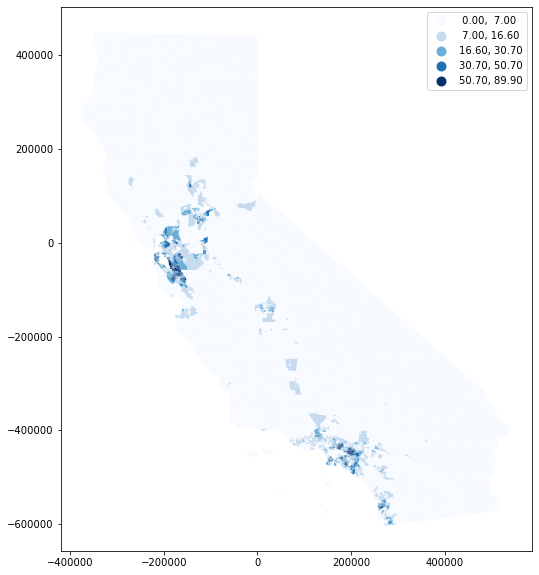

In [20]:
gdf_ces.plot(figsize=(12,10),
             column='Percent_AAPI',
             legend=True,
             cmap='Blues',
             scheme='NaturalBreaks')

In [22]:
# convert both to web mercator
gdf_ces = gdf_ces.to_crs(epsg=3857)

cpp_trim = cpp_trim.to_crs(epsg=3857)

In [23]:
# convert column to integer
cpp_trim['CES30_Percentile'] = pd.to_numeric(cpp_trim['CES30_Percentile'])

In [24]:
cpp_trim.dtypes

Name                       object
MW                         object
Fuel_Type                  object
Status                     object
County                     object
State                      object
Renewable_Energy           object
Jobs                      float64
CES30_PercentileRange      object
CES30_Percentile          float64
Lon                       float64
Lat                       float64
Income_Percent             object
Project_Location           object
geometry                 geometry
dtype: object

In [25]:
# convert column to integer
cpp_trim['MW'] = pd.to_numeric(cpp_trim['MW'])

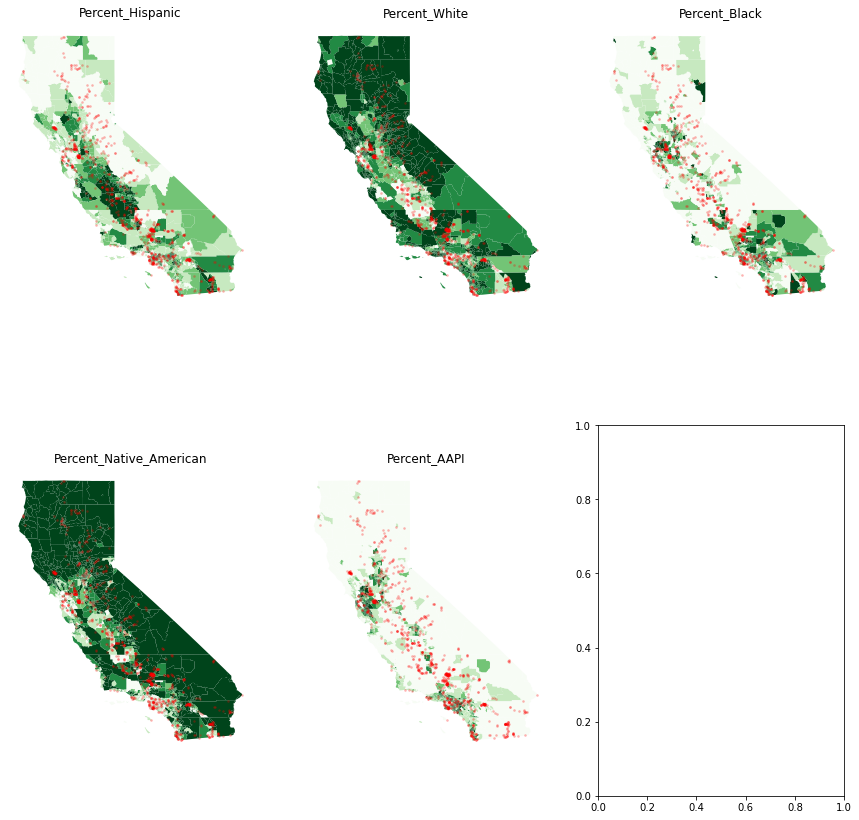

In [27]:
# make race subplots
f, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(ces_races):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    gdf_ces.plot(column=col, ax=ax, scheme='Quantiles', 
            linewidth=0, cmap='Greens')
    # Powerplant map
    cpp_trim.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=3,
            alpha=0.2)
    # Remove axes
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

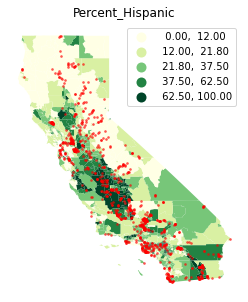

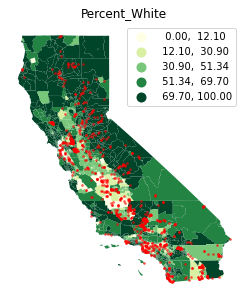

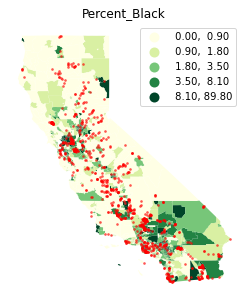

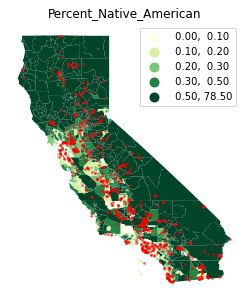

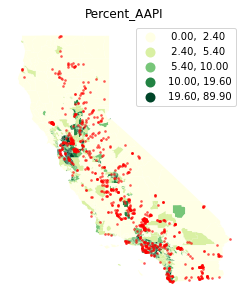

In [28]:
# for loop to plot powerplants across races
for i, col in enumerate(ces_races):
    fig, ax = plt.subplots(figsize=(5,5))
    
    gdf_ces.plot(ax=ax,
                 column=col,
                 scheme='Quantiles', 
                 linewidth=0,
                 legend=True,
                 cmap='YlGn')

    cpp_trim.plot(ax=ax,
            color='red',
            markersize=3,
            alpha=0.5)
    
    ax.set_axis_off()
    
    ax.set_title(col)
    
plt.show()

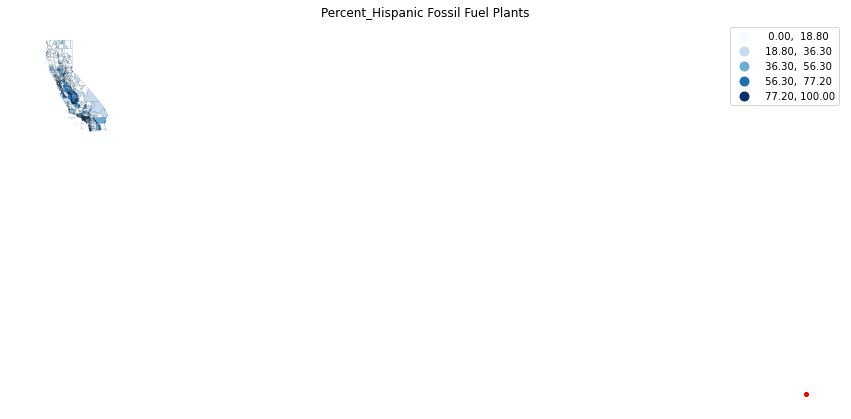

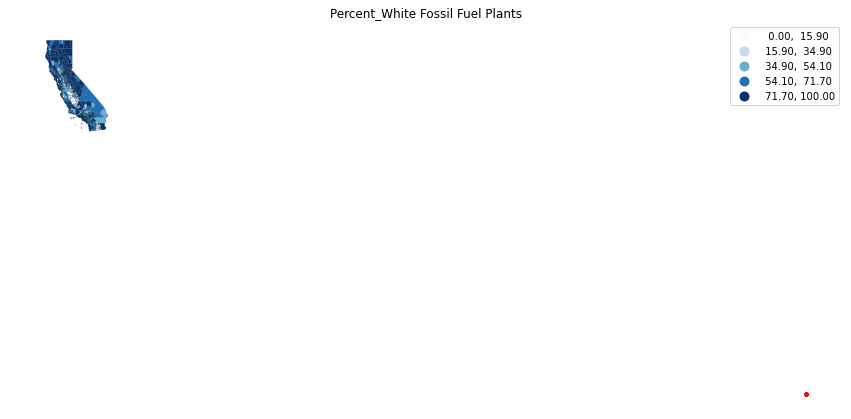

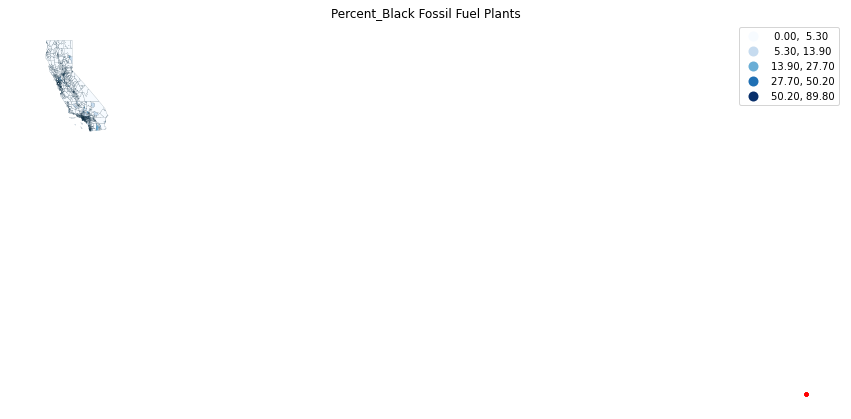

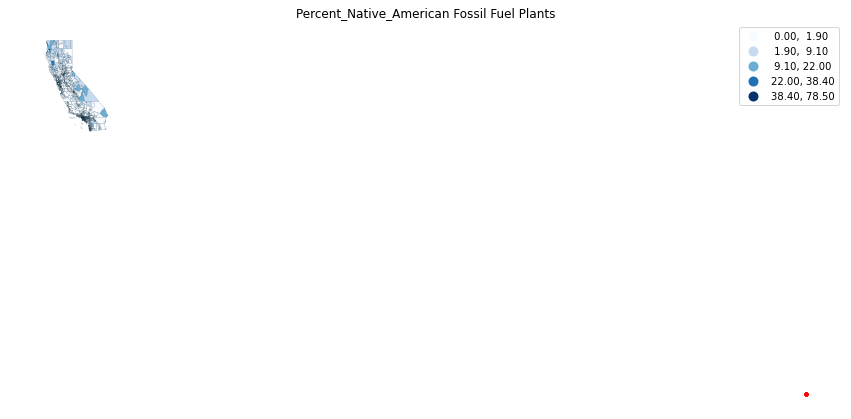

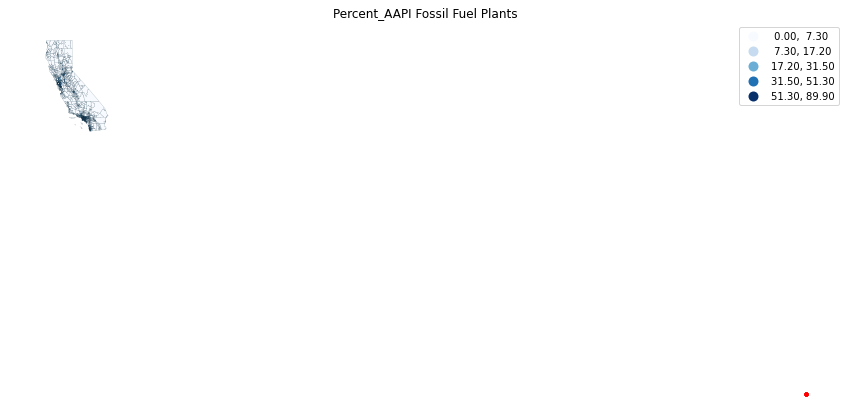

In [29]:
# for loop to plot fossil fuel plants across races
for i, col in enumerate(ces_races):
    fig, ax = plt.subplots(figsize=(10,10))
    
    gdf_ces.plot(ax=ax,
                 column=col,
                 scheme='naturalbreaks', 
                 linewidth=0.1,
                 edgecolor="#04253a",
                 legend=True,
                 cmap='Blues')

    cpp_trim_ff.plot(ax=ax,
            color='red',
            markersize=7,
            alpha=0.5)
    
    ax.set_axis_off()
    
    ax.set_title(str(col) + ' Fossil Fuel Plants')
    
plt.show()

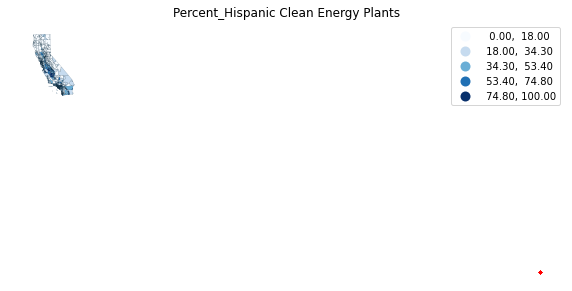

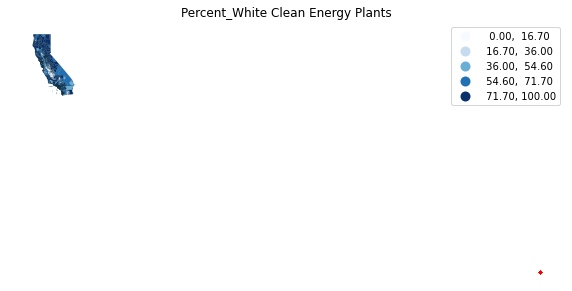

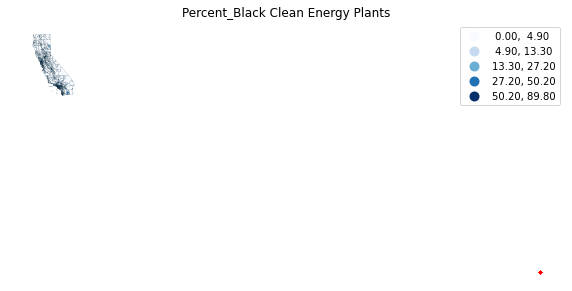

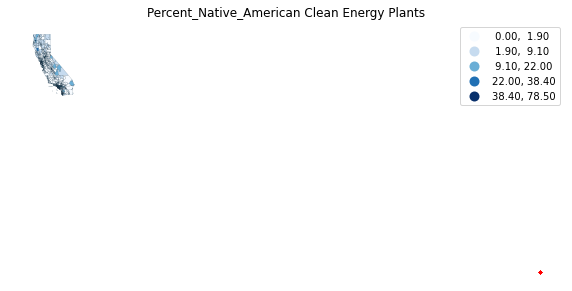

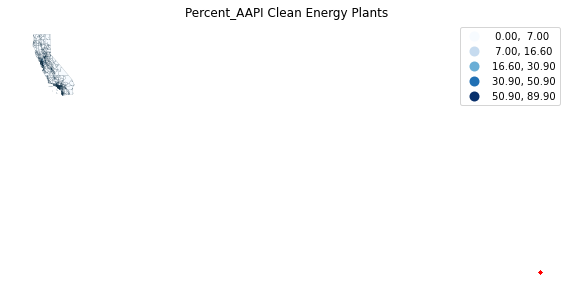

In [30]:
# for loop to plot clean energy plants across races
for i, col in enumerate(ces_races):
    fig, ax = plt.subplots(figsize=(10,10))
    
    gdf_ces.plot(ax=ax,
                 column=col,
                 scheme='naturalbreaks', 
                 linewidth=0.1,
                 edgecolor="#04253a",
                 legend=True,
                 cmap='Blues')

    cpp_trim_ce.plot(ax=ax,
            color='red',
            markersize=5,
            alpha=0.5)
    
    ax.set_axis_off()
    
    ax.set_title(str(col) + ' Clean Energy Plants')
    
plt.show()

In [31]:
# scatterplot of power plants by CES
fig = px.scatter(cpp_trim,
                 x = 'CES30_Percentile',
                 y = 'MW',
                 color = 'CES30_Percentile',
                 hover_name = 'County',
                 size = 'MW')

fig.show()

In [ ]:
# write to html for storymap display
fig.write_html("MWbyCES.html")